# Introduction to Machine Learning (CSCI-UA.473)
## Dimensionality Reduction Lab
### Code by: Stephen Spivack and Pascal Wallisch
### Date: April 13th, 2022

- The transformation of data from a high-dimensional space to a low-dimensional space
- The transformed representation retains as much information about the original representation as possible
- Useful for data visualization, cluster analysis and classification in fields such as signal processing and computer vision

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Singular Value Decomposition (SVD)

The singular value decomposition of an $m\times n$ matrix $M$ is a factorization of the form: 

$$M = U {\Sigma } V^{T} $$

where:


- $U$ is an ${\displaystyle m\times m}$ orthogonal rotation matrix, 

- ${\Sigma }$ is an ${\displaystyle m\times n}$ rectangular diagonal matrix of singular values, and

- $V^{T}$ is an $n\times n$ orthogonal rotation matrix.


Use cases for the SVD:

- Optimization and computational linear algebra: computing the pseudoinverse, solving homogeneous systems of linear equations, etc.

- Machine learning and statistics: dimension reduction via the principal component analysis (PCA) algorithm

- Applications: image compression

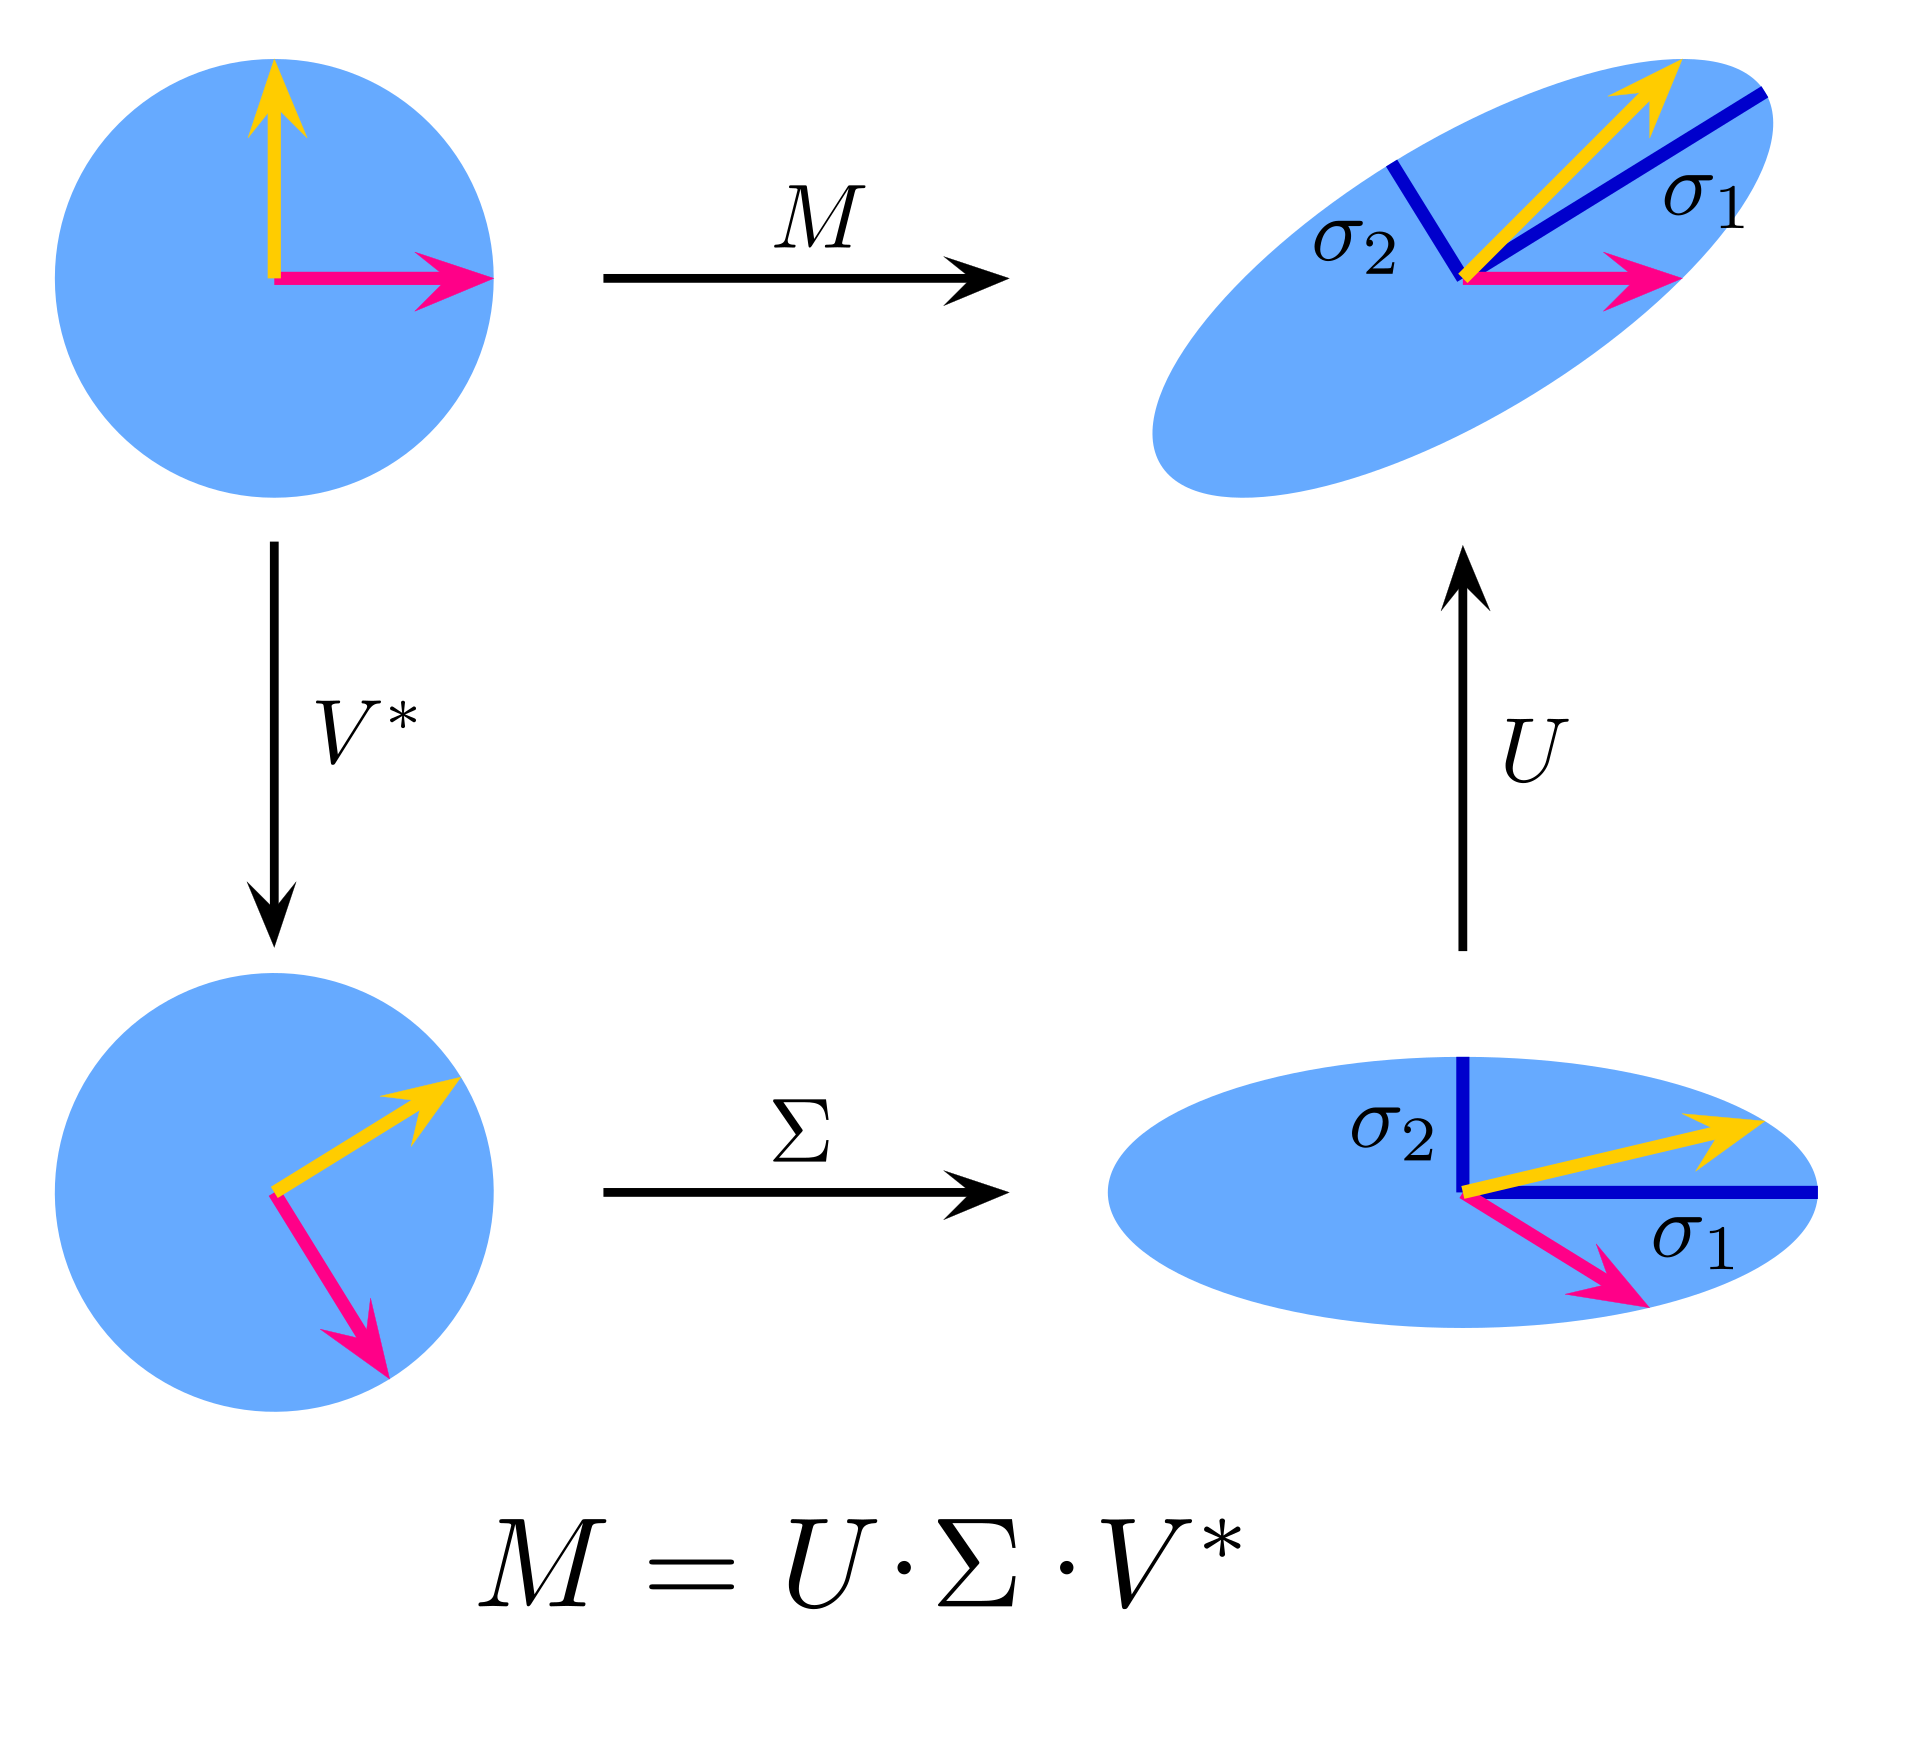

In [2]:
from IPython.display import Image
Image('svd_cartoon.png', width=500)

The singular value decomposition can be done with the `linalg.svd()` function from NumPy (note that `np.linalg.eig(A)` works only on square matrices and will give an error for `A`).

In [3]:
M = np.array([[7, 2], [3, 4], [5, 3]])
U, S, V = np.linalg.svd(M)

In [4]:
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

In [6]:
S

array([10.25142677,  2.62835484])

In [7]:
V

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

## Image Compression via the Singular Value Decomposition

Load image as ${\displaystyle n\times m}$ matrix of [RGB] values and grayscale it so we are left with ${\displaystyle n\times m}$ matrix of pixel intensity values:

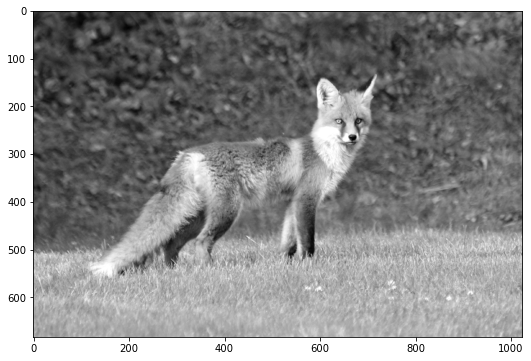

In [8]:
from PIL import Image
img = Image.open('fox.jpeg') # load
imggray = img.convert('LA') # grayscale
imgmat = np.array(list(imggray.getdata(band=0)), float) # convert to numpy array
imgmat.shape = (imggray.size[1], imggray.size[0]) # get handle on dimensions
plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

Compute the SVD using NumPy's `np.linalg.eig(A)` function:

In [9]:
U, S, V = np.linalg.svd(imgmat)
print("img: {}; U: {}; S: {}; V: {}".format(imgmat.shape, U.shape, S.shape, V.shape))

img: (683, 1024); U: (683, 683); S: (683,); V: (1024, 1024)


Iterate over list of [number of principal components] and plot the reconstructed image for each value:

img: (683, 1024)
U': (683, 5)
S': (5, 5)
V': (5, 1024)


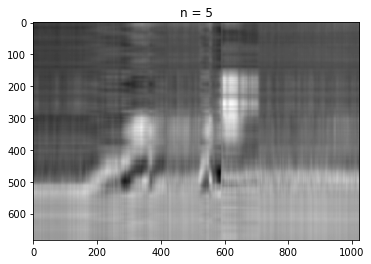

img: (683, 1024)
U': (683, 10)
S': (10, 10)
V': (10, 1024)


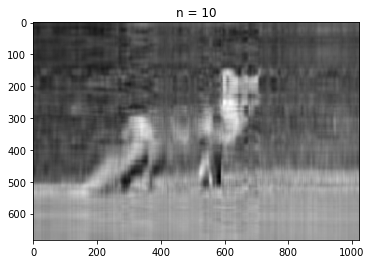

img: (683, 1024)
U': (683, 25)
S': (25, 25)
V': (25, 1024)


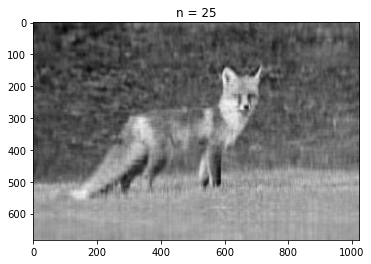

img: (683, 1024)
U': (683, 50)
S': (50, 50)
V': (50, 1024)


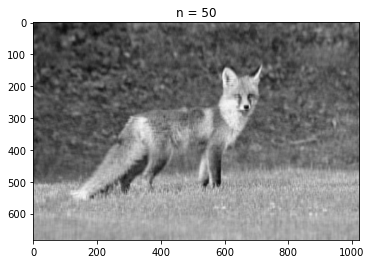

img: (683, 1024)
U': (683, 100)
S': (100, 100)
V': (100, 1024)


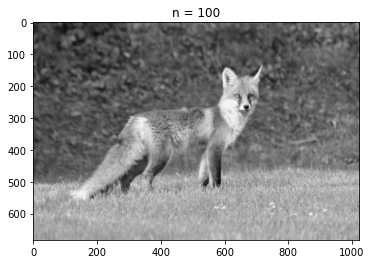

In [15]:
for i in [5, 10, 25, 50, 100]:
    reconstruct_img = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(V[:i, :])
    print("img: {}\nU': {}\nS': {}\nV': {}".format(imgmat.shape, U[:, :i].shape, np.diag(S[:i]).shape,V[:i, :].shape))
    plt.figure(figsize=(6, 4))
    plt.imshow(reconstruct_img, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

## Principal Component Analysis (PCA): step-by-step

Computational goal: to find **Principal Components** that 


- Are linear combinations of the original ones

- Are uncorrelated with one another

- Are orthogonal in original dimension space

- Capture as much of the original variance in the data as possible

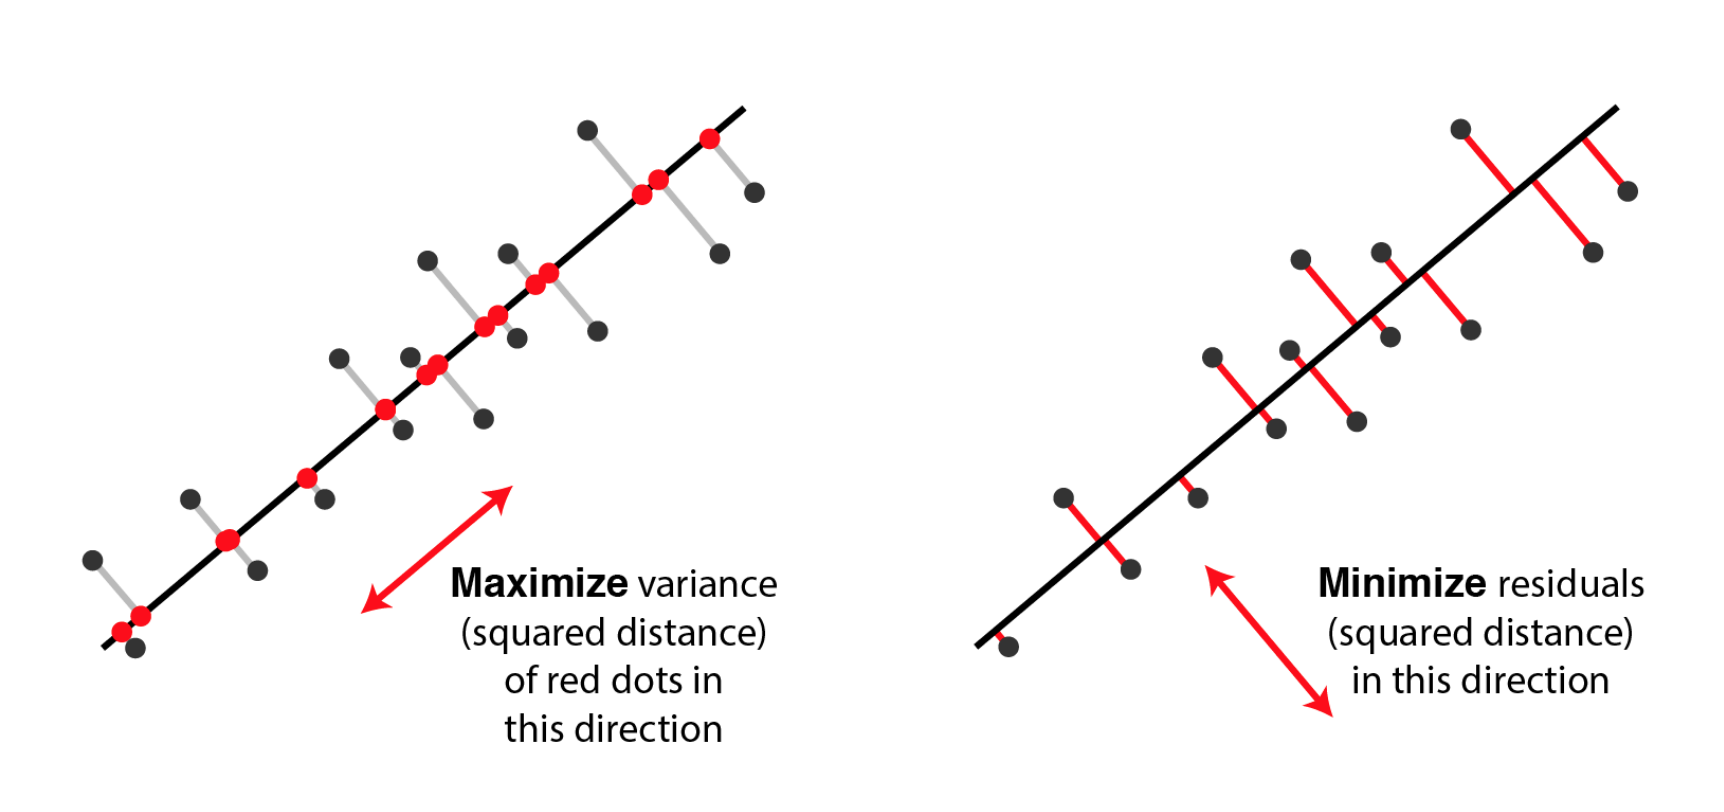

In [16]:
from IPython.display import Image
Image('pca.png', width=650)

Given some data represented as an $n\times d$ matrix $X$, where $n$ is the number of samples and $d$ is the dimension of data

In [17]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape, y.shape)

(150, 4) (150,)


Find the mean $\mu$ ($d$-dimensional vector) of all samples

In [18]:
mu = np.mean(X, axis=0)
print(mu)

[5.84333333 3.05733333 3.758      1.19933333]


Compute the covariance matrix $C = (X-\mu)^T(X-\mu)$

In [19]:
C = (X - mu).T @ (X - mu)
print(C)

[[102.16833333  -6.32266667 189.873       76.92433333]
 [ -6.32266667  28.30693333 -49.1188     -18.12426667]
 [189.873      -49.1188     464.3254     193.0458    ]
 [ 76.92433333 -18.12426667 193.0458      86.56993333]]


Compute the $k$ eigenvectors of $C$ (ordered by decreasing eigenvalues)

In [23]:
eigvals, eigvecs = np.linalg.eig(C)
print(eigvals.shape, eigvecs.shape) ## decreasing order

(4,) (4, 4)


Arrange such eigenvectors in a $d \times k$ matrix $E$

In [24]:
E = np.copy(eigvecs)
print(E.shape)

(4, 4)


Compute the projected samples as $P = X \cdot E$

In [25]:
P = X @ E
np.shape(P)

(150, 4)

Plot the first $k$ principal components of $P$

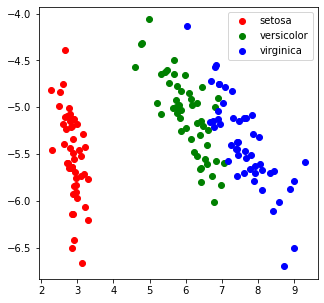

In [27]:
target_ids = range(len(iris.target_names))
plt.figure(figsize=(5, 5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(P[y == i, 0], P[y == i, 1], c=c, label=label)
plt.legend()
plt.show() ## 1st and 2nd principal component

Compute the reconstruction as $\tilde{X} = P \cdot E^T$

In [28]:
X_recon = P @ E.T
print(X_recon.shape)

(150, 4)


Compute the root-mean-square error (RMSE) between the actual versus reconstructed data

In [29]:
rmse = np.sqrt(np.mean((X - X_recon)**2))
print(rmse)

3.2901355998509205e-15


## Principal Component Analysis (PCA) using scikit-learn

Load the iris dataset once again:

In [30]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape, y.shape)

(150, 4) (150,)


Fit model to data selecting the first 2 principal components:

In [31]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(n_components=2, whiten=True)

Compute the transformed data:

In [32]:
X_pca = pca.transform(X)

Visualize the transformed data:

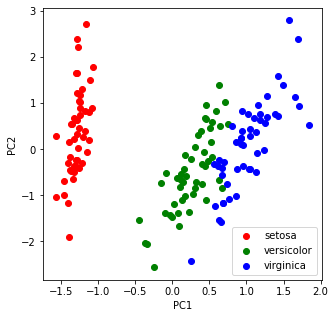

In [33]:
target_ids = range(len(iris.target_names))
plt.figure(figsize=(5, 5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## mean substraction

## T-distributed Stochastic Neighbor Embedding (t-SNE) using scikit-learn

A statistical method for visualizing high-dimensional data by giving each datapoint a location in either a two or three-dimensional space which can be easily visualized using a scatter plot. It is not recommended for use in analysis such as clustering or outlier detection since it does not necessarily preserve densities or distances well.

In [24]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape, y.shape)

(150, 4) (150,)


In [25]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(150, 2)

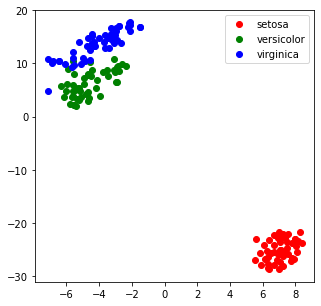

In [26]:
target_ids = range(len(iris.target_names))
plt.figure(figsize=(5, 5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_embedded[y == i, 0], X_embedded[y == i, 1], c=c, label=label)
plt.legend()
plt.show()